# <span style = "color:IndianRed; font-size:40px"> Brain Tumor Classification (MRI)</span>

***

A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.
Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

## Context

Brain Tumors are complex.  There are lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging an time-consuming to generate reports from MRI. So an automated system can solve this problem.

## Definition

To Detect and Classify Brain Tumor using CNN, and TL; as an asset of Deep Learning and to examine the tumor position(segmentation).

## Let's Begin

### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
import glob

### Fetch the training Data

#### Use glob

The data contains 4 subclasses. Store all 4 in different variables

In [2]:
glioma = glob.glob('Brain_tumor/Training/glioma_tumor/*.jpg')
meningioma = glob.glob('Brain_tumor/Training/meningioma_tumor/*.jpg')
no_tumor = glob.glob('Brain_tumor/Training/no_tumor/*.jpg')
pituitary = glob.glob('Brain_tumor/Training/pituitary_tumor/*.jpg')

### Fetch the testing data

In [3]:
test_glioma = glob.glob('Brain_tumor/Testing/glioma_tumor/*.jpg')
test_meningioma = glob.glob('Brain_tumor/Testing/meningioma_tumor/*.jpg')
test_no_tumor = glob.glob('Brain_tumor/Testing/no_tumor/*.jpg')
test_pituitary = glob.glob('Brain_tumor/Testing/pituitary_tumor/*.jpg')

### Find the number of images of all classes in the Training set

In [91]:
print("Number of images in Training set are: \nGlioma:",len(glioma),"\nMeninglioma:", len(meningioma),"\nNo Tumor:", len(no_tumor),"\nPituitary:",len(pituitary))

Number of images in Training set are: 
Glioma: 84 
Meninglioma: 72 
No Tumor: 72 
Pituitary: 84


### Find the number of images of all classes in the testing set

In [92]:
print("Number of images in Training set are: \nGlioma:",len(test_glioma),"\nMeninglioma:", len(test_meningioma),"\nNo Tumor:", len(test_no_tumor),"\nPituitary:",len(test_pituitary))

Number of images in Training set are: 
Glioma: 24 
Meninglioma: 24 
No Tumor: 24 
Pituitary: 24


### Store all the images inside a list and create a list with the corresponding labels

### For Training set

In [55]:
image = []
label = []

for i in glioma:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

    
for i in meningioma:
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in pituitary:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in no_tumor:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

### For Testing set

In [56]:
image_test = []
label_test = []

for i in test_glioma:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

    
for i in test_meningioma:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)
    
for i in test_pituitary:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(2)
    
for i in test_no_tumor:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(3)

### Shuffle both image list and label list (In both Training and testing set)

#### Use shuffle function from sklearn utils

In [57]:
image, label = shuffle(image,label, random_state = 100)

In [58]:
image_test, label_test = shuffle(image_test,label_test, random_state = 100)

### Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

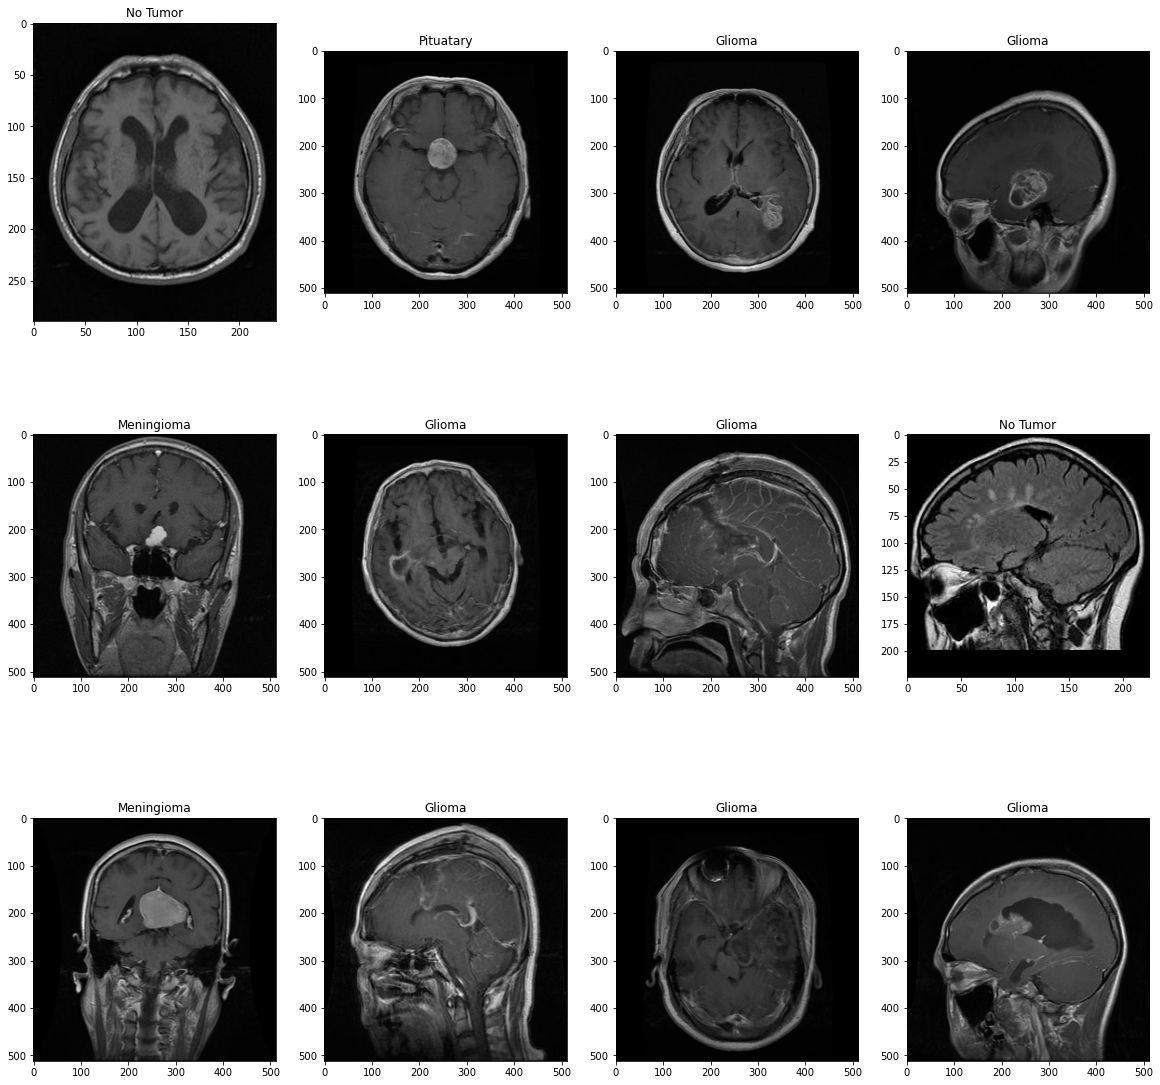

In [59]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] == 0:
        plt.title('Glioma')
    elif label[i] == 1:
        plt.title('Meningioma')
    elif label[i] == 2:
        plt.title('Pituatary')
    else:
        plt.title('No Tumor')

### Check the shape of the first 10 images in our list (Either from training or test set)

In [60]:
for i in range(10):
    print(image[i].shape)

(290, 236, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(225, 225, 3)
(512, 512, 3)
(512, 512, 3)


### Reshape the images to 224x224( For both training and testing set)

Also reassign them to new variables named X_train and X_test and convert them to a numpy array

In [61]:
X_train = []

for i in image:
    X_train.append(resize(i,(224,224,3)))
    
X_train = np.array(X_train)

In [62]:
X_test = []

for i in image_test:
    X_test.append(resize(i,(224,224,3)))
    
X_test = np.array(X_test)

### Create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [64]:
y_train = np.array(label)
y_test = np.array(label_test)

### Plot some of our reshaped images

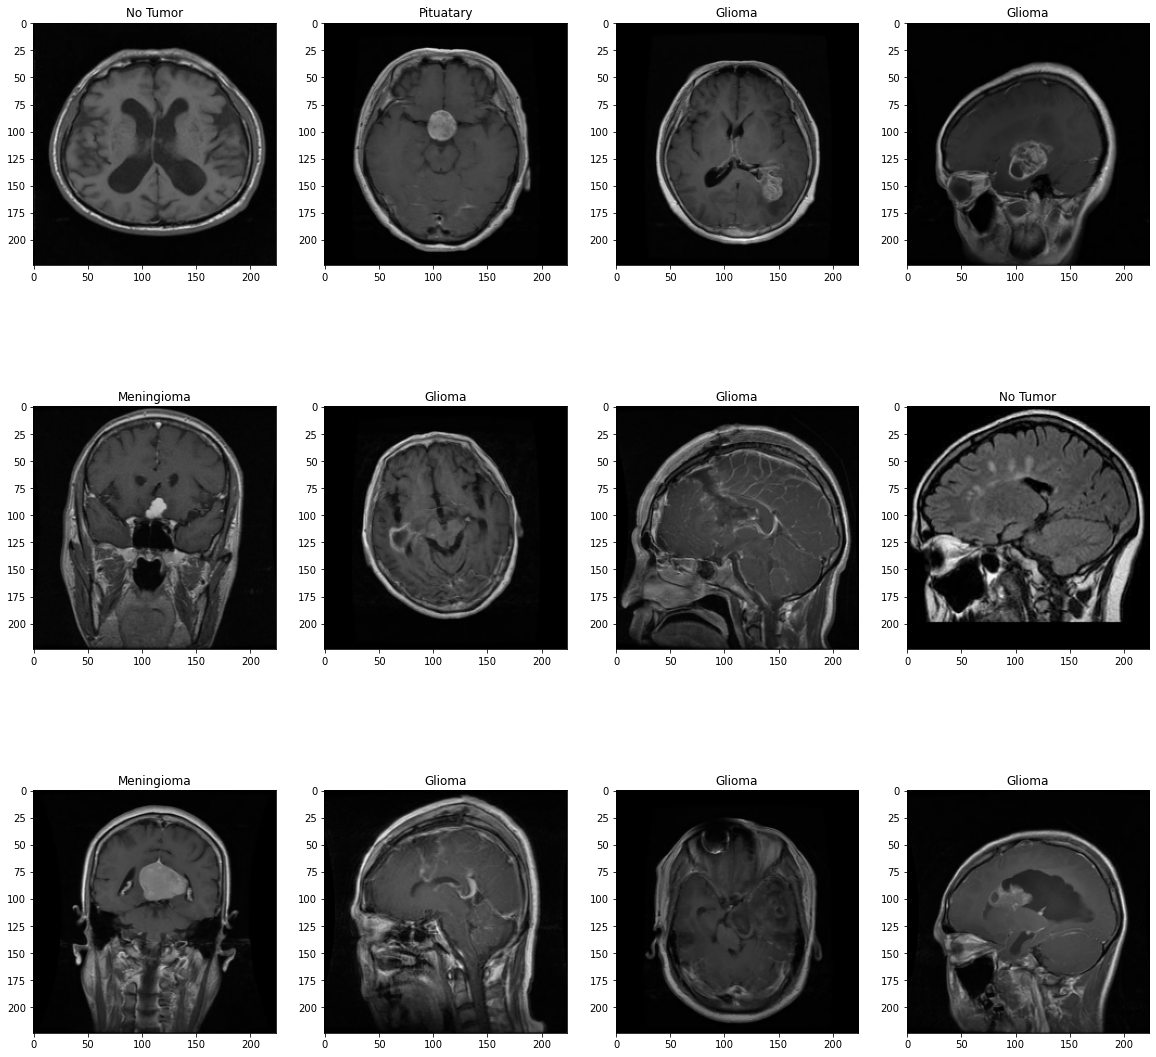

In [63]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    if label[i] == 0:
        plt.title('Glioma')
    elif label[i] == 1:
        plt.title('Meningioma')
    elif label[i] == 2:
        plt.title('Pituatary')
    else:
        plt.title('No Tumor')

### Check the shape of X_train and X_test and y_train and y_test

In [95]:
print("Shape of X_train is:", X_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (312, 224, 224, 3)
Shape of X_test is: (96, 224, 224, 3)
Shape of y_train is: (312,)
Shape of y_test is: (96,)


### Create a keras Sequential model with convolution layers, Flatten and  Hidden layers

In [97]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224,3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(4, activation = 'sigmoid')
])

### Compile the model

#### Use 'sparse_categorical_crossentropy' for loss

In [98]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

### Check the summary of our model

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 32)        9248      
_________________________________________________________________
flatten_5 (Flatten)          (None, 86528)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

### Train the model. 
Make sure to include a validation data with validation_split

In [99]:
model.fit(X_train,y_train, epochs=5, steps_per_epoch=20, validation_split=0.1)

Epoch 1/5
20/20 [==============================] - 9s 436ms/step - loss: 1.1679 - accuracy: 0.5429 - val_loss: 0.8997 - val_accuracy: 0.6562
Epoch 2/5
20/20 [==============================] - 11s 530ms/step - loss: 0.5379 - accuracy: 0.8000 - val_loss: 0.7999 - val_accuracy: 0.7500
Epoch 3/5
20/20 [==============================] - 12s 605ms/step - loss: 0.1895 - accuracy: 0.9393 - val_loss: 0.7236 - val_accuracy: 0.8750
Epoch 4/5
20/20 [==============================] - 13s 671ms/step - loss: 0.0785 - accuracy: 0.9821 - val_loss: 1.2419 - val_accuracy: 0.7500
Epoch 5/5
20/20 [==============================] - 14s 698ms/step - loss: 0.0219 - accuracy: 0.9964 - val_loss: 0.7598 - val_accuracy: 0.8750


### Evaluate the model

In [71]:
model.evaluate(X_train, y_train)

10/10 [==============================] - 8s 803ms/step - loss: 0.1365 - accuracy: 0.9647


[0.13646499812602997, 0.9647436141967773]

### Make predictions with X_test

In [100]:
prediction = model.predict(X_test)

In [101]:
prediction[:5]

array([[3.96158173e-09, 2.59192660e-07, 1.04352678e-08, 1.22434884e-01],
       [4.91268474e-06, 1.90019608e-04, 6.44176362e-06, 5.02902687e-01],
       [1.65888886e-10, 3.21482077e-07, 3.92973423e-02, 5.72746813e-01],
       [2.73172821e-11, 5.42746825e-08, 1.39520839e-08, 3.94334674e-01],
       [4.45670723e-10, 1.07088685e-03, 8.26060358e-08, 4.83083725e-03]],
      dtype=float32)

### Use np.argmax to fetch indices of max element of the array

Store the values in a list

In [103]:
y_pred = [np.argmax(i) for i in prediction]

In [78]:
y_pred[:5]

[3, 3, 2, 3, 3]

### Plot X_test with label from our prediction

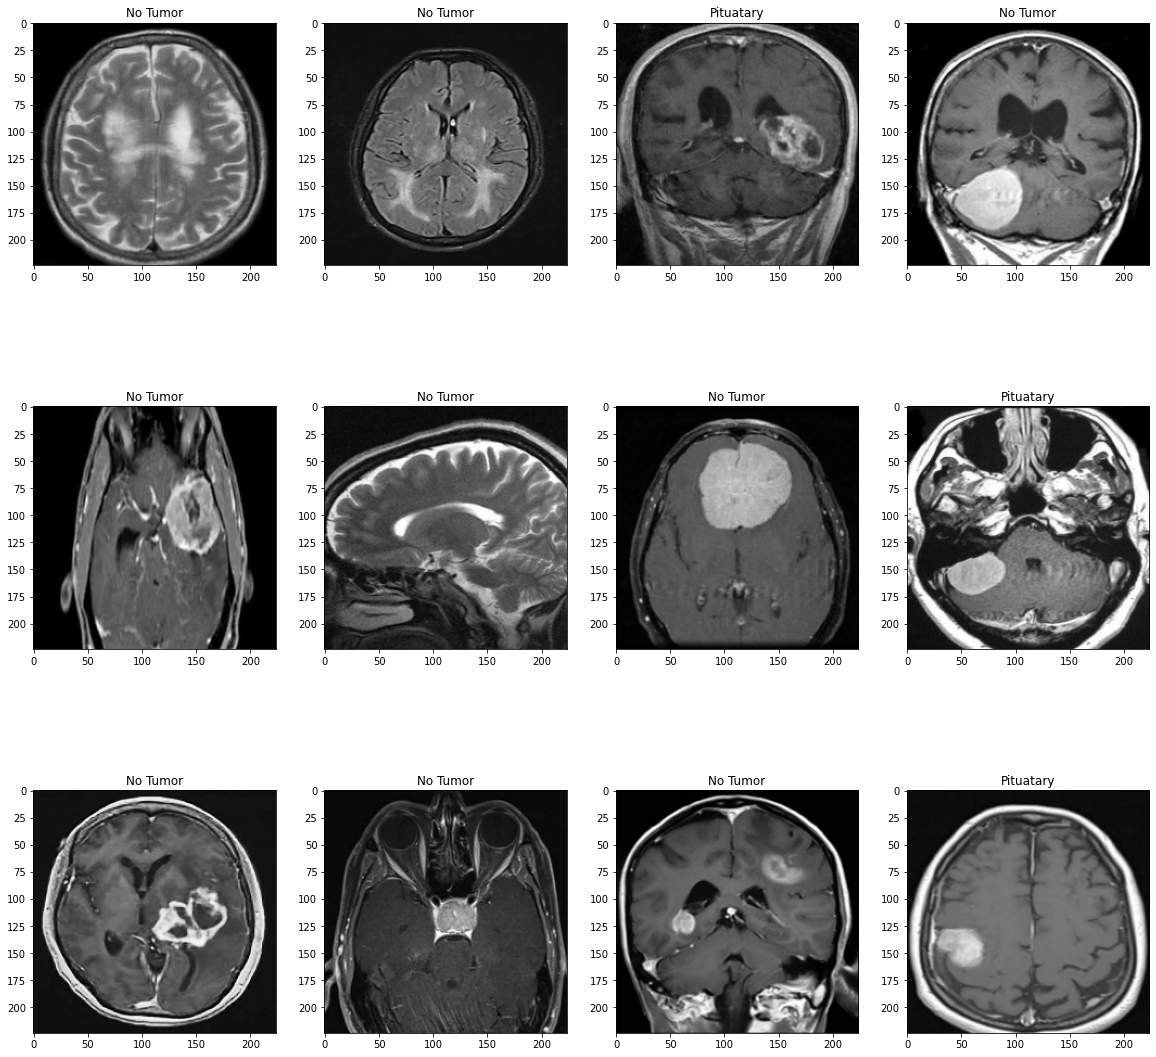

In [80]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if y_pred[i] == 0:
        plt.title('Glioma')
    elif y_pred[i] == 1:
        plt.title('Meningioma')
    elif y_pred[i] == 2:
        plt.title('Pituatary')
    else:
        plt.title('No Tumor')

### Visualise confusion matrix on a heatmap

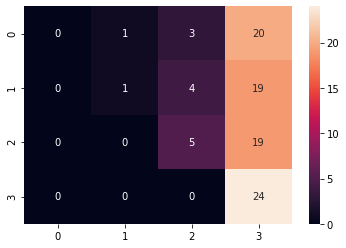

In [106]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)
plt.show()

***

# <center><a href = "http://edure.in/"><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">Thanks</span></a></center>